In [20]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
import seaborn as sns;sns.set(font_scale=1.2)
%matplotlib inline

In [21]:
recipies = pd.read_csv('Machine Learning Full/Machine Learning Tutorial Part 1 _ 2/Cupcakes vs Muffins.csv')
print(recipies.head());


     Type  Flour  Milk  Sugar  Butter  Egg  Baking Powder  Vanilla  Salt
0  Muffin     55    28      3       7    5              2        0     0
1  Muffin     47    24     12       6    9              1        0     0
2  Muffin     47    23     18       6    4              1        0     0
3  Muffin     45    11     17      17    8              1        0     0
4  Muffin     50    25     12       6    5              2        1     0


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


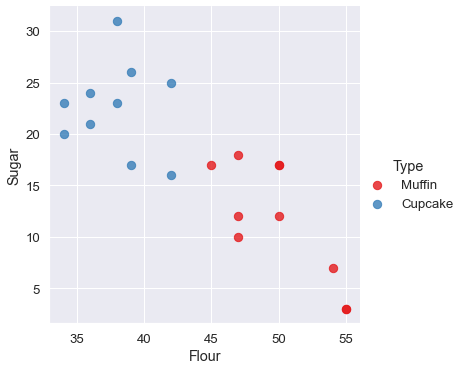

In [22]:
sns.lmplot('Flour','Sugar',data = recipies, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})

In [23]:
type_label = np.where(recipies['Type']=='Muffin',0,1)
recipe_feature = recipies.columns.values[1:].tolist()
print(recipe_feature)
ingredients = recipies[['Flour','Sugar']].values
print(ingredients)

['Flour', 'Milk', 'Sugar', 'Butter', 'Egg', 'Baking Powder', 'Vanilla', 'Salt']
[[55  3]
 [47 12]
 [47 18]
 [45 17]
 [50 12]
 [55  3]
 [54  7]
 [47 10]
 [50 17]
 [50 17]
 [39 26]
 [42 16]
 [34 20]
 [39 17]
 [38 23]
 [42 25]
 [36 21]
 [38 31]
 [36 24]
 [34 23]]


In [24]:
model = svm.SVC(kernel='linear')
model.fit(ingredients,type_label)
print(model)

SVC(kernel='linear')


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


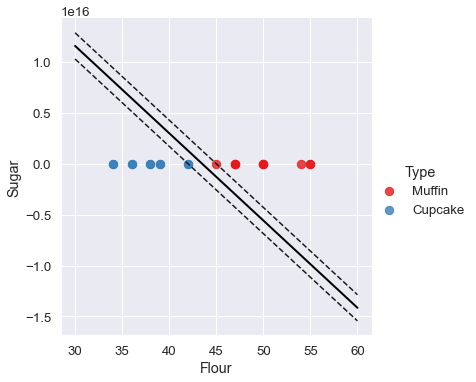

In [25]:
w = model.coef_[0]
m = -w[0]/w[1]
# m = slope
x = np.linspace(30,60)
y = m*x-model.intercept_[0]/w[1]

b = model.support_vectors_[0]
y_down = m*x + (b[1]-m*b[0])
b = model.support_vectors_[-1]
y_up = m*x + (b[1]-m*b[0])

sns.lmplot('Flour','Sugar',data = recipies, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(x,y,linewidth = 2, color = 'black')
plt.plot(x,y_down,'k--')
plt.plot(x,y_up,'k--')

In [26]:
def muffin_or_cupcake(flour,sugar):
    if(model.predict([[flour,sugar]]))==0:
        print("\n You are looking at a muffin recipe!")
    else:
        print("\n You are looking at a cupcake recipe!")

muffin_or_cupcake(50,20)
muffin_or_cupcake(40,20)


 You are looking at a muffin recipe!

 You are looking at a cupcake recipe!


/usr/local/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


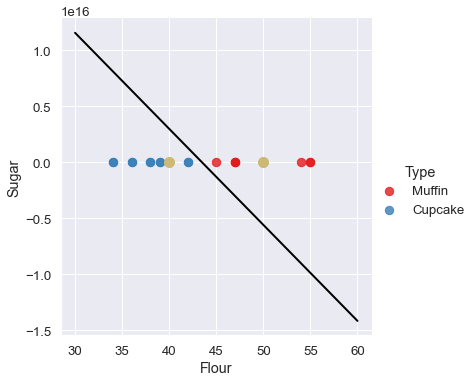

In [27]:
sns.lmplot('Flour','Sugar',data = recipies, hue='Type', palette='Set1', fit_reg=False, scatter_kws={"s":70})
plt.plot(x,y,linewidth = 2, color = 'black')
plt.plot(50,20,'yo',markersize = '10')
plt.plot(40,20,'yo',markersize = '10')